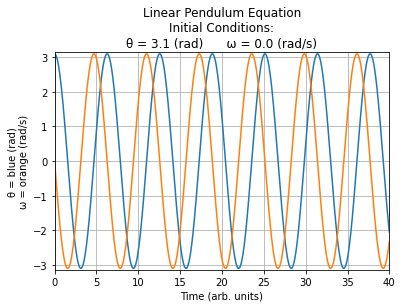

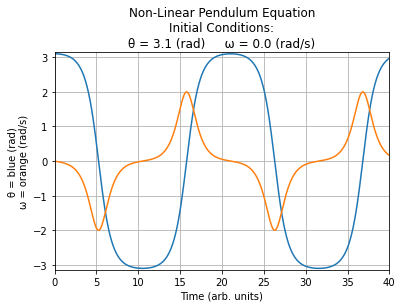

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

#Parameters for the pendulum problem
k, A = 0.0, 0.0
g, L = 1.0, 1.0
fi = 0.66667

#A function of the Linear Pendulum formula 
def linear_f(theta, omega, time):
    "This is for the linear pendulum case. Note that k and A are set to 0, so only the first term is relevant."
    force = (-g/L) * theta - k * omega + A*math.cos(fi*time)  #damping and driven force
    return force

#A function of the Non-Linear Pendulum formula 
def nonlinear_f(theta, omega, time):
    "This is for the non-linear pendulum case. Note that k and A are set to 0, so only the first term is relevant."
    force = (-g/L) * math.sin(theta) - k * omega + A*math.cos(fi*time)  #damping and driven force
    return force

#setting initial conditions
theta = 3.1
omega = 0.0
t = 0.0
dt = 0.01

#lists that will store the evolution of theta and omega in time
list_theta = [theta]
list_omega = [omega]
list_time = [t]

#trapezoid method
for _ in range(1,4000):
    k1a = dt * omega
    k1b = dt * linear_f(theta, omega, t)
    k2a = dt * (omega + k1b)
    k2b = dt * linear_f(theta + k1a, omega + k1b, t + dt)
    theta = theta + (k1a + k2a)/2
    omega = omega + (k1b + k2b)/2

    t = t + dt #evolve time step

    #adding calculated theta, omega and t values to their respective lists
    list_theta.append(theta) 
    list_omega.append(omega)
    list_time.append(t)

#resetting initial conditions
theta = 3.1
omega = 0.0
t = 0.0
dt = 0.01

#lists that will store the theta, omega and nonlinear time values
list_nonlinear_theta = [theta]
list_nonlinear_omega = [omega]
list_nonlinear_time = [t]

#trapezoid method
for _ in range(1,4000):
    k1a = dt * omega
    k1b = dt * nonlinear_f(theta, omega, t)
    k2a = dt * (omega + k1b)
    k2b = dt * nonlinear_f(theta + k1a, omega + k1b, t + dt)
    theta = theta + (k1a + k2a)/2
    omega = omega + (k1b + k2b)/2

    t = t + dt #evolve time step

    #adding calculated theta, omega and t values to their respective lists
    list_nonlinear_theta.append(theta) 
    list_nonlinear_omega.append(omega)
    list_nonlinear_time.append(t)

#plotting instructions for linear graph
plt.plot(list_time, list_theta) #plots theta plot
plt.plot(list_time, list_omega) #plots omega plot
plt.xlim(0,40) #sets x-axis from [0,40]
plt.ylim(-math.pi,math.pi) #sets y-axis from [-pi,pi]
plt.title("Linear Pendulum Equation\nInitial Conditions:\nθ = %0.1f (rad)      ω = %0.1f (rad/s)"%(list_theta[0],list_omega[0]) )
plt.xlabel('Time (arb. units)')
plt.ylabel('θ = blue (rad)\nω = orange (rad/s)')
plt.grid(True)

#plotting instructions for non-linear graph
plt.figure()
plt.plot(list_nonlinear_time, list_nonlinear_theta) #plots nonlinear theta plot
plt.plot(list_nonlinear_time, list_nonlinear_omega) #plots nonlinear omega plot
plt.xlim(0,40) #sets x-axis from [0,40]
plt.ylim(-math.pi,math.pi) #sets y-axis from [-pi,pi]
plt.title("Non-Linear Pendulum Equation\nInitial Conditions:\nθ = %0.1f (rad)     ω = %0.1f (rad/s)"%(list_theta[0],list_omega[0]) )
plt.xlabel('Time (arb. units)')
plt.ylabel('θ = blue (rad)\nω = orange (rad/s)')
plt.grid(True)